<a href="https://colab.research.google.com/github/kty3452/ML-Class/blob/main/UCI/MHEALTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파일 내용 확인

### Subtask:
`README.txt` 파일의 내용을 확인하여 데이터셋에 대한 기본적인 정보를 파악합니다.


In [2]:
with open("/content/drive/MyDrive/MHEALTHDATASET/README.txt", 'r', encoding='latin-1') as f:
    readme_content = f.read()
print(readme_content)


*************************************************** mHealth dataset **********************************************************

Authors: Oresti Baños, Rafael Garcia, Alejandro Saez
Date: 22/10/2013
Institution: University of Granada (UGR) 
Department: Department of Computer Architecture and Computer Technology.
Contact: oresti@ugr.es (oresti.bl@gmail.com)

---------------------------------------------------------------------------------------------------------------------------------------------
NOTE: if you use this dataset please cite the following work

Banos, O., Garcia, R., Holgado-Terriza, J.A., Damas, M., Pomares, H., Rojas, I., Saez, A., Villalonga, C.: 
mHealthDroid: a novel framework for agile development of mobile health applications. 
In: Proceedings of the 6th International Work-conference on Ambient Assisted Living an Active Ageing (IWAAL 2014), Belfast, United Kingdom, December 2-5 (2014)

Insightful figures and descriptions are presented within this work.
-------------

**Reasoning**:
Summarize the key information about the dataset based on the README content.



In [3]:
dataset_summary = """
Dataset Name: mHealth dataset
Authors: Oresti Baños, Rafael Garcia, Alejandro Saez
Institution: University of Granada (UGR)
Date: 22/10/2013

Data Collection:
- Ten volunteers with diverse profiles.
- 12 physical activities performed by volunteers.
- Shimmer2 wearable sensors used for recordings.
- Sensors placed on chest, right wrist, and left ankle.
- Measures: acceleration, rate of turn, magnetic field orientation (from all sensors), 2-lead ECG (chest sensor).
- Sampling Rate: 50 Hz for all modalities.
- Activities collected in an out-of-lab environment.

Activities:
L1: Standing still (1 min)
L2: Sitting and relaxing (1 min)
L3: Lying down (1 min)
L4: Walking (1 min)
L5: Climbing stairs (1 min)
L6: Waist bends forward (20x)
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

Data Format:
- Data for each subject stored in a separate file: 'mHealth_subject<SUBJECT_ID>.log'.
- Each file contains samples (rows) for all sensors (columns).
- Activity labels are numerical (e.g., '4' for walking).

Column Details (partial):
Column 1-3: Chest sensor acceleration (X, Y, Z)
Column 4-5: Electrocardiogram signal (lead 1, lead 2)
Column 6-8: Left-ankle sensor acceleration (X, Y, Z)
... (More columns for other sensor data)
"""
print(dataset_summary)


Dataset Name: mHealth dataset
Authors: Oresti Baños, Rafael Garcia, Alejandro Saez
Institution: University of Granada (UGR)
Date: 22/10/2013

Data Collection:
- Ten volunteers with diverse profiles.
- 12 physical activities performed by volunteers.
- Shimmer2 wearable sensors used for recordings.
- Sensors placed on chest, right wrist, and left ankle.
- Measures: acceleration, rate of turn, magnetic field orientation (from all sensors), 2-lead ECG (chest sensor).
- Sampling Rate: 50 Hz for all modalities.
- Activities collected in an out-of-lab environment.

Activities:
L1: Standing still (1 min)
L2: Sitting and relaxing (1 min)
L3: Lying down (1 min)
L4: Walking (1 min)
L5: Climbing stairs (1 min)
L6: Waist bends forward (20x)
L7: Frontal elevation of arms (20x)
L8: Knees bending (crouching) (20x)
L9: Cycling (1 min)
L10: Jogging (1 min)
L11: Running (1 min)
L12: Jump front & back (20x)

Data Format:
- Data for each subject stored in a separate file: 'mHealth_subject<SUBJECT_ID>.log'

## 데이터 로딩

### Subtask:
데이터 분석을 위해 필요한 데이터를 로딩합니다. (README 파일 자체는 분석 대상이 아닐 수 있습니다. 실제 분석할 데이터 파일이 있다면 해당 파일을 로딩합니다.)


**Reasoning**:
Based on the README, the data is in '.log' files named 'mHealth_subject<SUBJECT_ID>.log'. I will load 'mHealth_subject101.log' into a pandas DataFrame for initial exploration. Since the file has no header and is likely space-separated, I will specify this during loading and provide placeholder column names.



In [36]:
import os, numpy as np
from collections import Counter
import tensorflow as tf
from tensorflow.keras import layers, models


# Define the base directory and file pattern
base_dir = "/content/drive/MyDrive/MHEALTHDATASET/"
file_pattern = "mHealth_subject{}.log"

# Define column names based on README
column_names = [
    'chest_acc_x', 'chest_acc_y', 'chest_acc_z',
    'ecg_lead_1', 'ecg_lead_2',
    'left_ankle_acc_x', 'left_ankle_acc_y', 'left_ankle_acc_z',
    'left_ankle_gyro_x', 'left_ankle_gyro_y', 'left_ankle_gyro_z',
    'left_ankle_mag_x', 'left_ankle_mag_y', 'left_ankle_mag_z',
    'right_lower_arm_acc_x', 'right_lower_arm_acc_y', 'right_lower_arm_acc_z',
    'right_lower_arm_gyro_x', 'right_lower_arm_gyro_y', 'right_lower_arm_gyro_z',
    'right_lower_arm_mag_x', 'right_lower_arm_mag_y', 'right_lower_arm_mag_z',
    'activity_label'
]

# Create an empty list to store dataframes
all_subjects_df = []

# Loop through subject IDs 1 to 10
for subject_id in range(1, 11):
    file_path = os.path.join(base_dir, file_pattern.format(subject_id))
    try:
        # Load the data, assuming space separation and no header
        df = pd.read_csv(file_path, sep='\s+', header=None)
        all_subjects_df.append(df)
        print(f"Successfully loaded data for subject {subject_id}")
    except FileNotFoundError:
        print(f"Error: File not found for subject {subject_id}: {file_path}")
    except Exception as e:
        print(f"Error loading data for subject {subject_id}: {e}")

# Concatenate all dataframes
if all_subjects_df:
    df_combined = pd.concat(all_subjects_df, ignore_index=True)
    # Assign column names
    df_combined.columns = column_names
    print("\nCombined DataFrame loaded successfully. First 5 rows:")
    display(df_combined.head())
    print("\nCombined DataFrame Info:")
    df_combined.info()
    print("\nCombined DataFrame Shape:")
    print(df_combined.shape)
else:
    print("\nNo dataframes were loaded.")

<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3742567447.py:32: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None)


Successfully loaded data for subject 1
Successfully loaded data for subject 2
Successfully loaded data for subject 3
Successfully loaded data for subject 4
Successfully loaded data for subject 5
Successfully loaded data for subject 6
Successfully loaded data for subject 7
Successfully loaded data for subject 8
Successfully loaded data for subject 9
Successfully loaded data for subject 10

Combined DataFrame loaded successfully. First 5 rows:


,chest_acc_x,chest_acc_y,chest_acc_z,ecg_lead_1,ecg_lead_2,left_ankle_acc_x,left_ankle_acc_y,left_ankle_acc_z,left_ankle_gyro_x,left_ankle_gyro_y,...,right_lower_arm_acc_x,right_lower_arm_acc_y,right_lower_arm_acc_z,right_lower_arm_gyro_x,right_lower_arm_gyro_y,right_lower_arm_gyro_z,right_lower_arm_mag_x,right_lower_arm_mag_y,right_lower_arm_mag_z,activity_label
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0



Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   chest_acc_x             1215745 non-null  float64
 1   chest_acc_y             1215745 non-null  float64
 2   chest_acc_z             1215745 non-null  float64
 3   ecg_lead_1              1215745 non-null  float64
 4   ecg_lead_2              1215745 non-null  float64
 5   left_ankle_acc_x        1215745 non-null  float64
 6   left_ankle_acc_y        1215745 non-null  float64
 7   left_ankle_acc_z        1215745 non-null  float64
 8   left_ankle_gyro_x       1215745 non-null  float64
 9   left_ankle_gyro_y       1215745 non-null  float64
 10  left_ankle_gyro_z       1215745 non-null  float64
 11  left_ankle_mag_x        1215745 non-null  float64
 12  left_ankle_mag_y        1215745 non-null  float64
 13  left_ankle_mag_z        1215745

In [37]:
# Assuming the combined dataframe from the previous step is named 'df_combined'

# Calculate data count per subject
# The original code didn't store subject IDs in the combined dataframe.
# To get the count per subject, we need to reload and keep track of subjects, or
# assume the data is concatenated in order and split based on the known size of each subject's data.
# A more reliable way is to reload and add a subject ID column during loading.

# Let's add a subject ID column while loading to accurately count per subject.
all_subjects_df_with_id = []
subject_ids = range(1, 11)

for subject_id in subject_ids:
    file_path = os.path.join(base_dir, file_pattern.format(subject_id))
    try:
        df = pd.read_csv(file_path, sep='\s+', header=None)
        df['subject_id'] = subject_id  # Add subject ID column
        all_subjects_df_with_id.append(df)
        print(f"Successfully loaded data with subject ID for subject {subject_id}")
    except FileNotFoundError:
        print(f"Error: File not found for subject {subject_id}: {file_path}")
    except Exception as e:
        print(f"Error loading data for subject {subject_id}: {e}")

if all_subjects_df_with_id:
    df_combined_with_id = pd.concat(all_subjects_df_with_id, ignore_index=True)
    # Assign column names, including the new 'subject_id' column
    full_column_names = column_names + ['subject_id']
    df_combined_with_id.columns = full_column_names

    print("\nCombined DataFrame with Subject ID loaded successfully.")

    # Calculate data count per subject
    print("\nData count per subject:")
    display(df_combined_with_id['subject_id'].value_counts().sort_index())

    # Calculate count of each activity label
    print("\nActivity label counts:")
    display(df_combined_with_id['activity_label'].value_counts().sort_index())
else:
    print("\nNo dataframes were loaded with subject ID.")

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3774227275.py:16: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None)


Successfully loaded data with subject ID for subject 1
Successfully loaded data with subject ID for subject 2
Successfully loaded data with subject ID for subject 3
Successfully loaded data with subject ID for subject 4
Successfully loaded data with subject ID for subject 5
Successfully loaded data with subject ID for subject 6
Successfully loaded data with subject ID for subject 7
Successfully loaded data with subject ID for subject 8
Successfully loaded data with subject ID for subject 9
Successfully loaded data with subject ID for subject 10

Combined DataFrame with Subject ID loaded successfully.

Data count per subject:


,count
subject_id,
1,161280
2,130561
3,122112
4,116736
5,119808
6,98304
7,104448
8,129024
9,135168



Activity label counts:


,count
activity_label,
0,872550
1,30720
2,30720
3,30720
4,30720
5,30720
6,28315
7,29441
8,29337


In [38]:
# Assuming the combined dataframe with subject ID from the previous step is named 'df_combined_with_id'

# Filter out rows where activity_label is 0
df_filtered = df_combined_with_id[df_combined_with_id['activity_label'] != 0].copy()

print("DataFrame with activity_label != 0 loaded successfully.")
print("\nFiltered DataFrame Info:")
df_filtered.info()
print("\nFiltered DataFrame Shape:")
print(df_filtered.shape)

# Calculate data count per subject for the filtered data
print("\nData count per subject (excluding activity_label 0):")
display(df_filtered['subject_id'].value_counts().sort_index())

# Calculate count of each activity label for the filtered data
print("\nActivity label counts (excluding activity_label 0):")
display(df_filtered['activity_label'].value_counts().sort_index())

DataFrame with activity_label != 0 loaded successfully.

Filtered DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 343195 entries, 6656 to 1213645
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   chest_acc_x             343195 non-null  float64
 1   chest_acc_y             343195 non-null  float64
 2   chest_acc_z             343195 non-null  float64
 3   ecg_lead_1              343195 non-null  float64
 4   ecg_lead_2              343195 non-null  float64
 5   left_ankle_acc_x        343195 non-null  float64
 6   left_ankle_acc_y        343195 non-null  float64
 7   left_ankle_acc_z        343195 non-null  float64
 8   left_ankle_gyro_x       343195 non-null  float64
 9   left_ankle_gyro_y       343195 non-null  float64
 10  left_ankle_gyro_z       343195 non-null  float64
 11  left_ankle_mag_x        343195 non-null  float64
 12  left_ankle_mag_y        343195 non-null  float6

,count
subject_id,
1,35174
2,35532
3,35380
4,35328
5,33947
6,32205
7,34253
8,33332
9,34354



Activity label counts (excluding activity_label 0):


,count
activity_label,
1,30720
2,30720
3,30720
4,30720
5,30720
6,28315
7,29441
8,29337
9,30720


/tmp/ipython-input-300859079.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subject_id', data=df_filtered, palette='viridis')


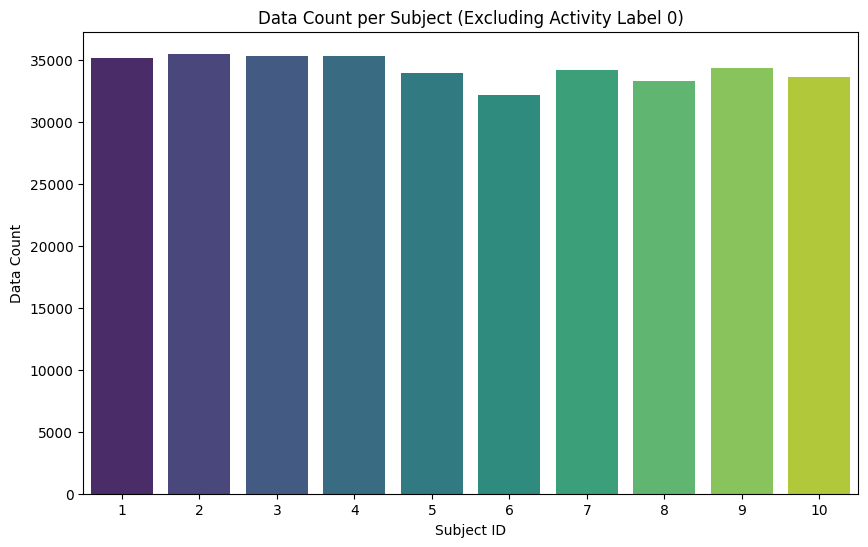

/tmp/ipython-input-300859079.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity_label', data=df_filtered, palette='viridis')


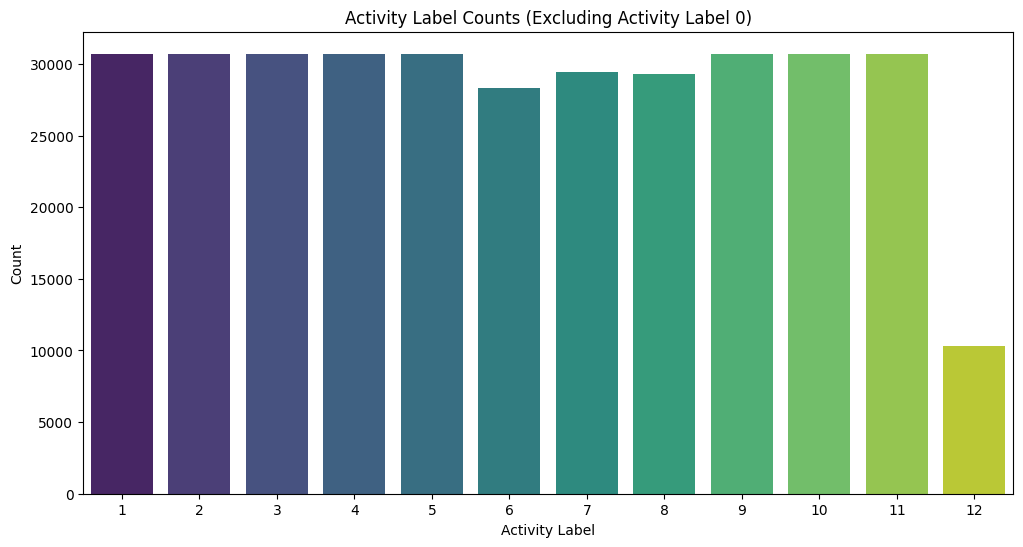

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the combined dataframe with subject ID is named 'df_combined_with_id'
# Filter out rows where activity_label is 0
if 'df_combined_with_id' in locals():
    df_filtered = df_combined_with_id[df_combined_with_id['activity_label'] != 0].copy()

    # Visualize data count per subject (excluding activity_label 0)
    plt.figure(figsize=(10, 6))
    sns.countplot(x='subject_id', data=df_filtered, palette='viridis')
    plt.title('Data Count per Subject (Excluding Activity Label 0)')
    plt.xlabel('Subject ID')
    plt.ylabel('Data Count')
    plt.show()

    # Visualize activity label counts (excluding activity_label 0)
    plt.figure(figsize=(12, 6))
    sns.countplot(x='activity_label', data=df_filtered, palette='viridis')
    plt.title('Activity Label Counts (Excluding Activity Label 0)')
    plt.xlabel('Activity Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0) # Keep labels horizontal for readability
    plt.show()
else:
    print("Error: 'df_combined_with_id' DataFrame not found. Please run the data loading cell first.")

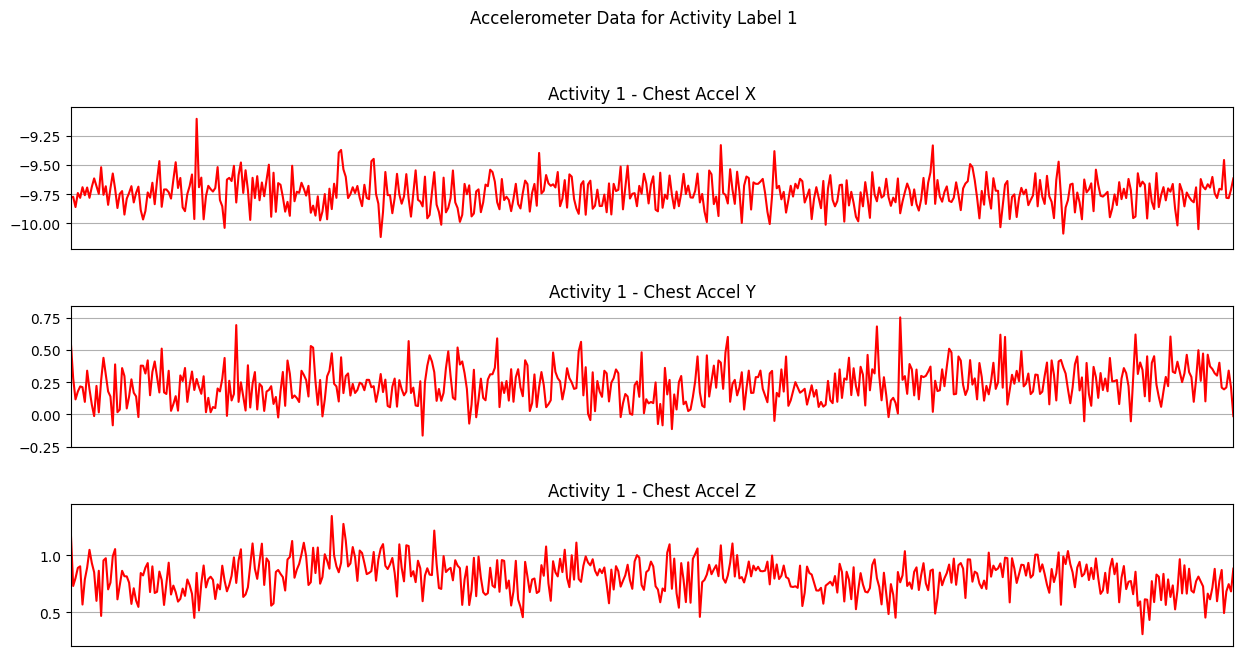

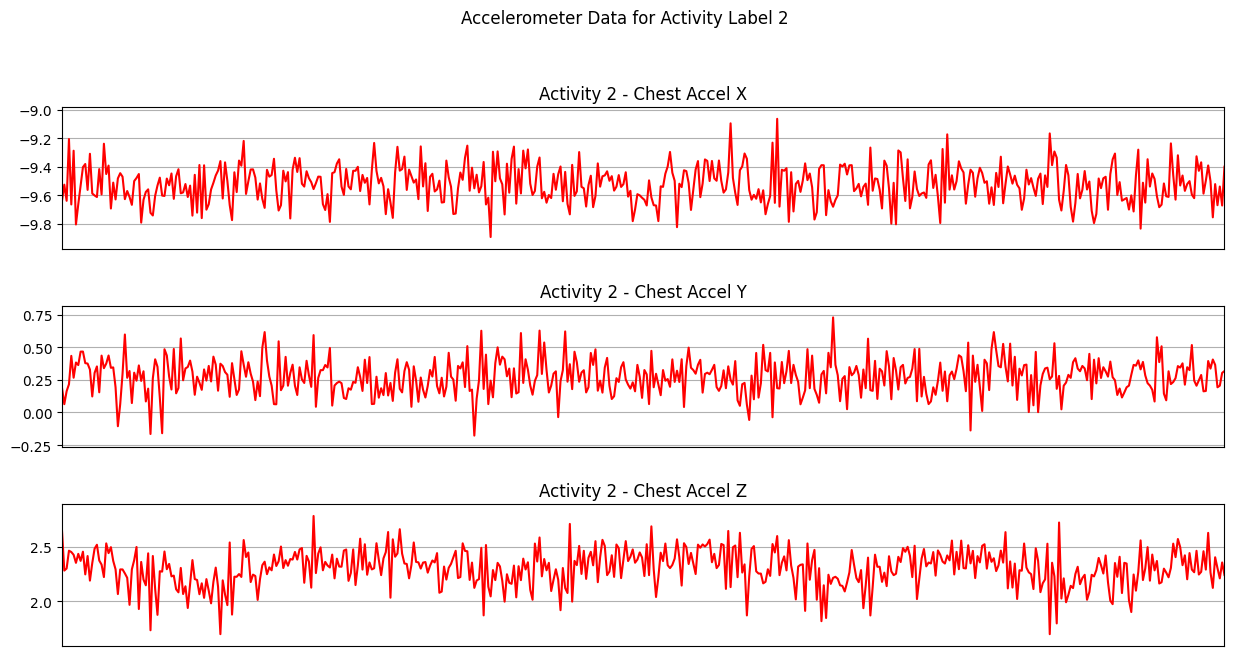

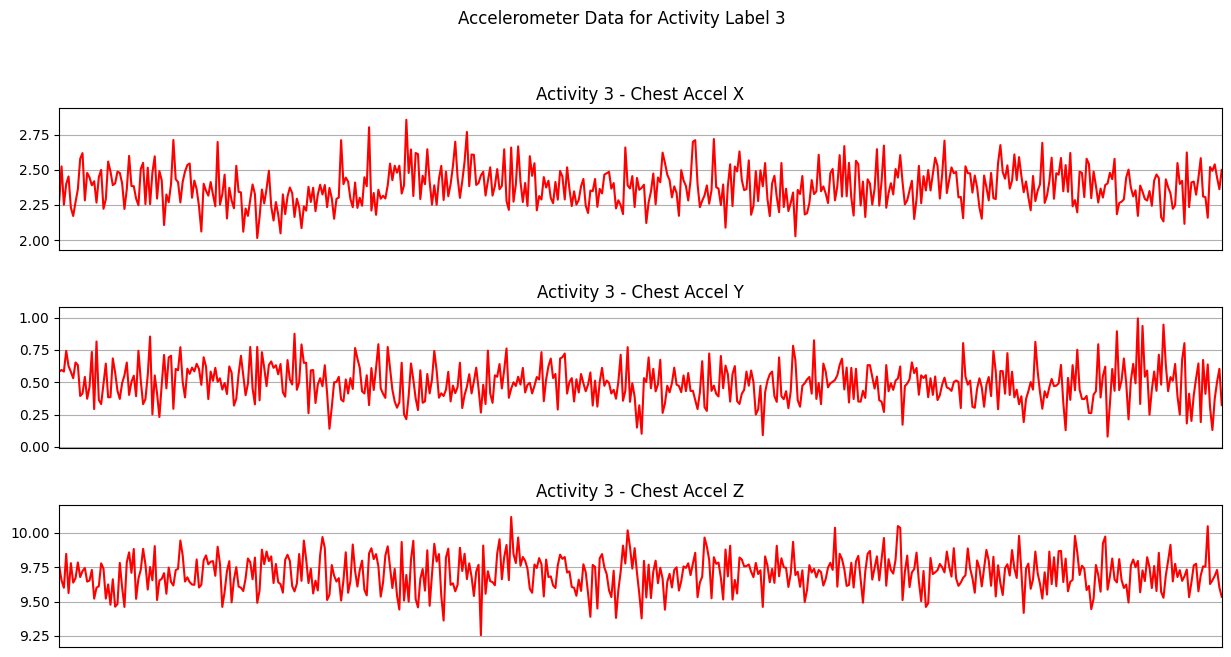

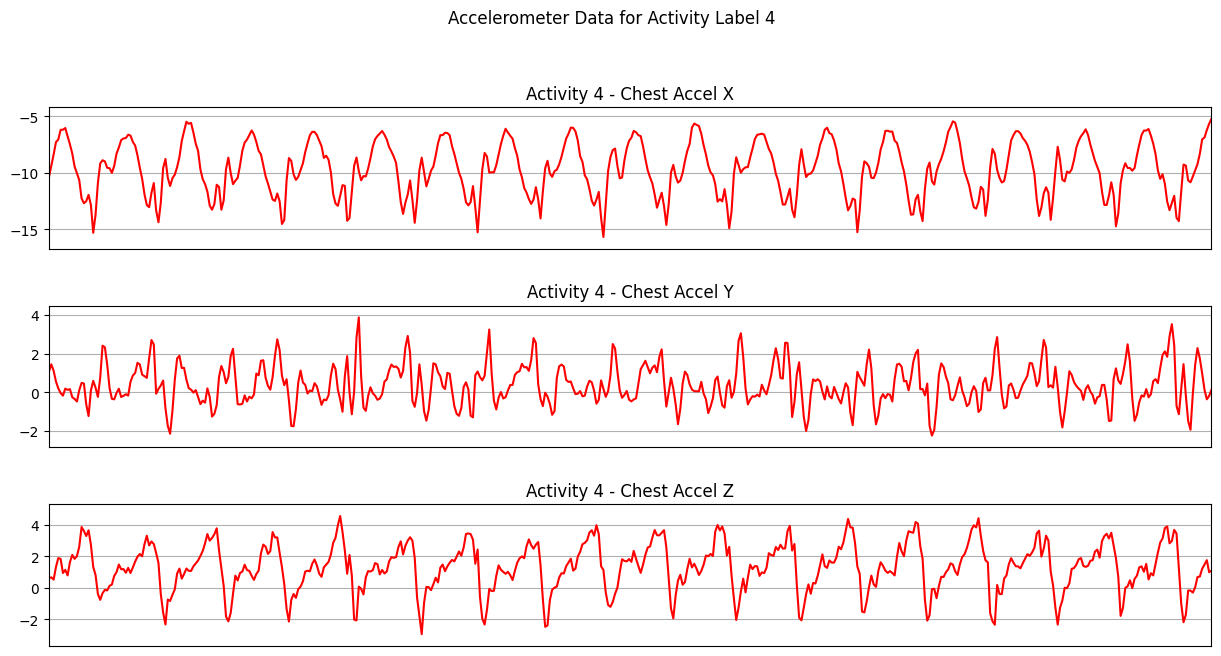

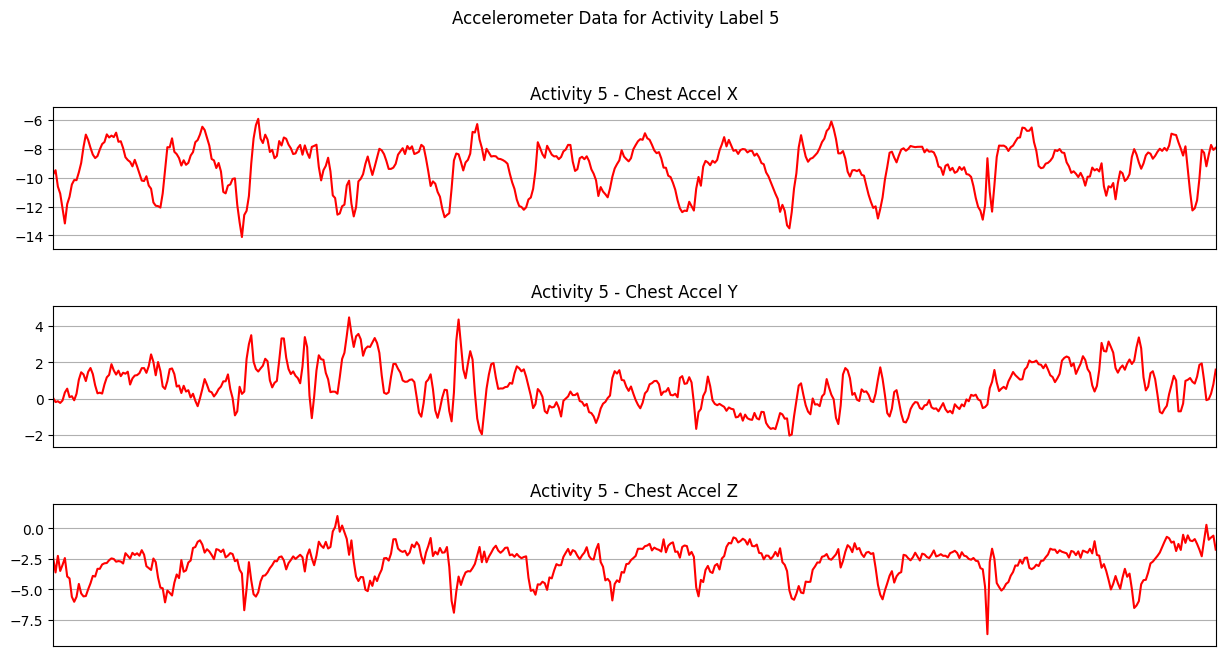

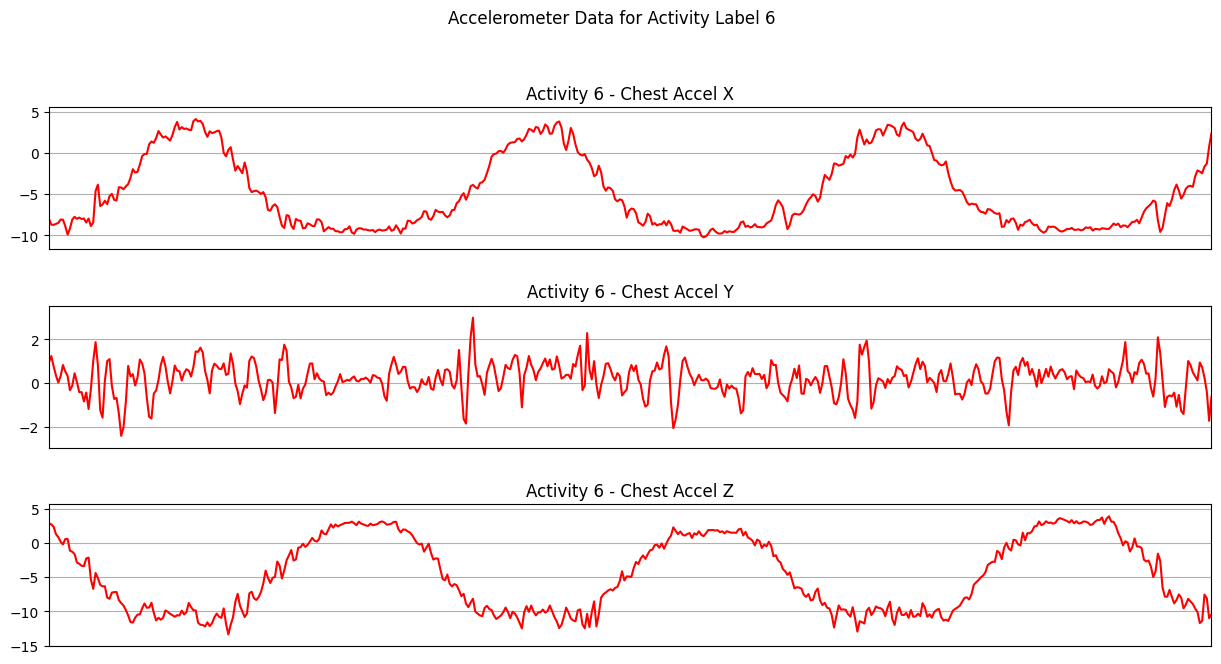

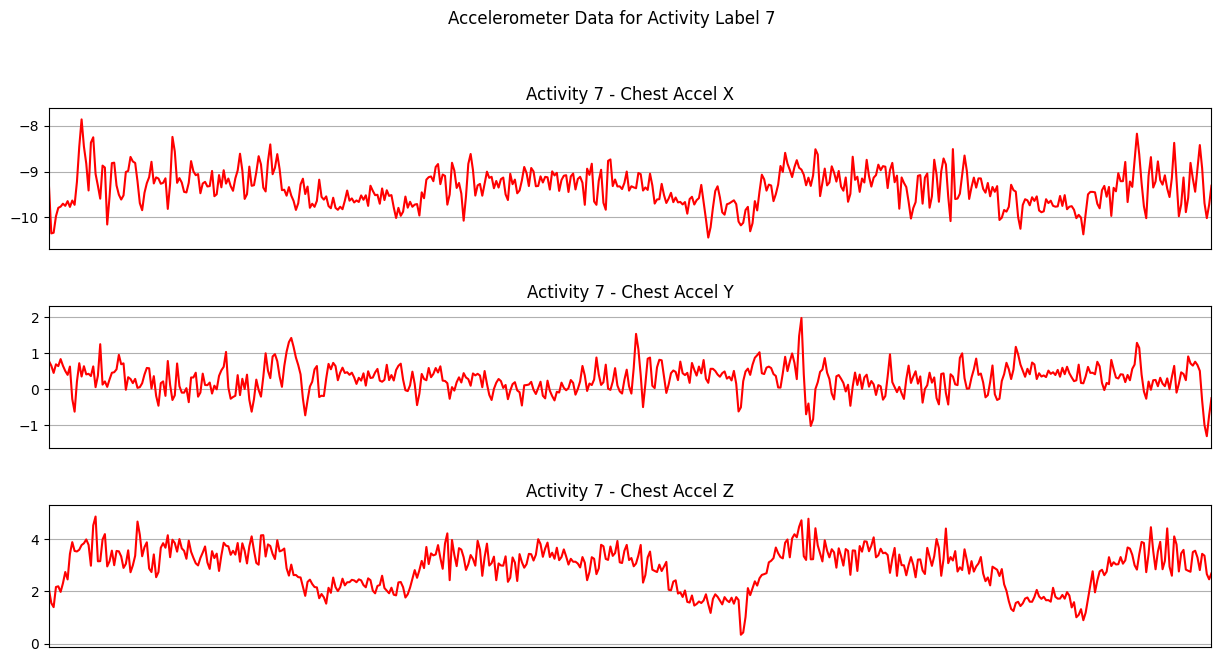

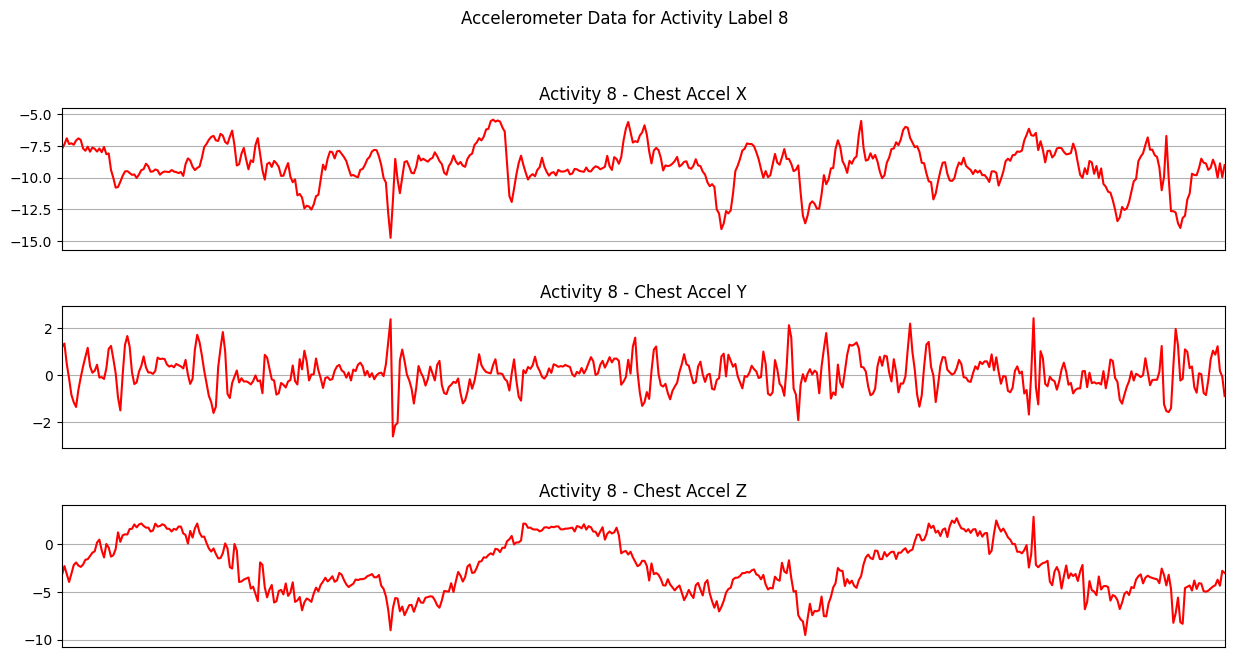

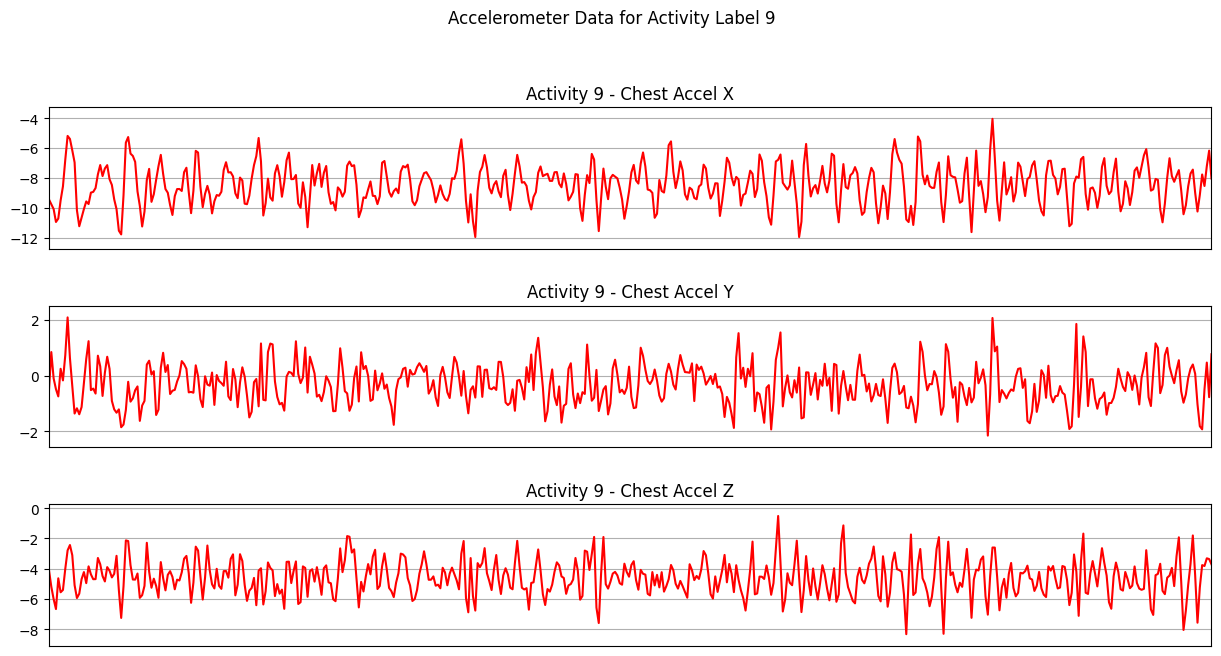

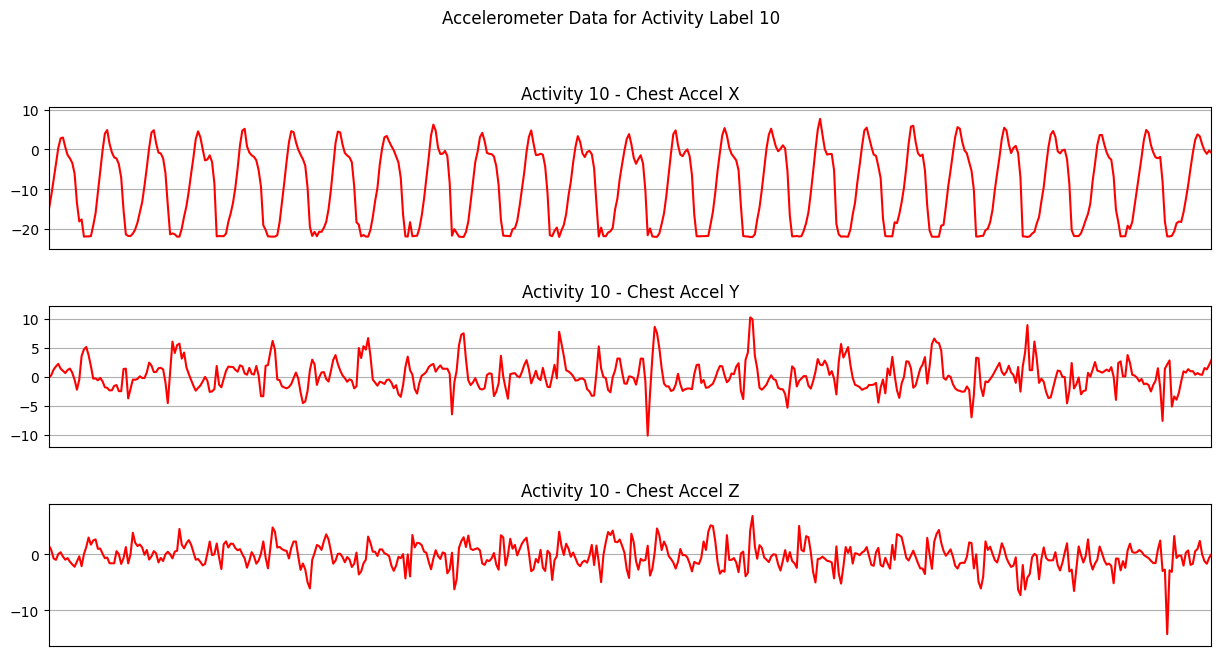

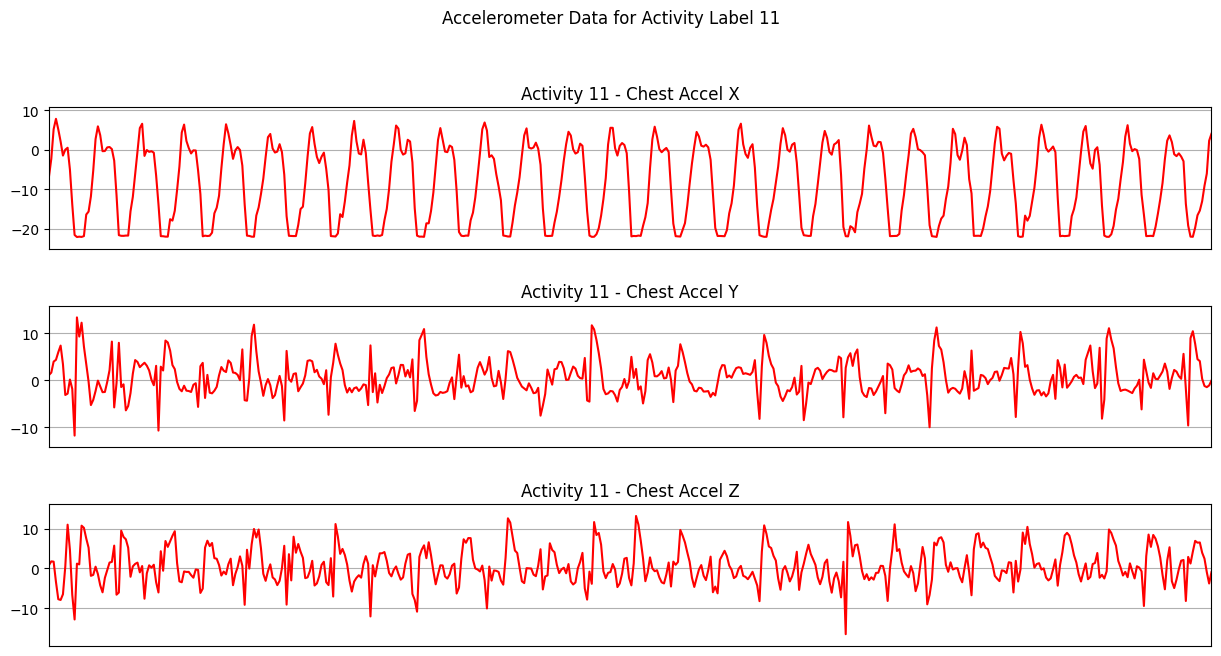

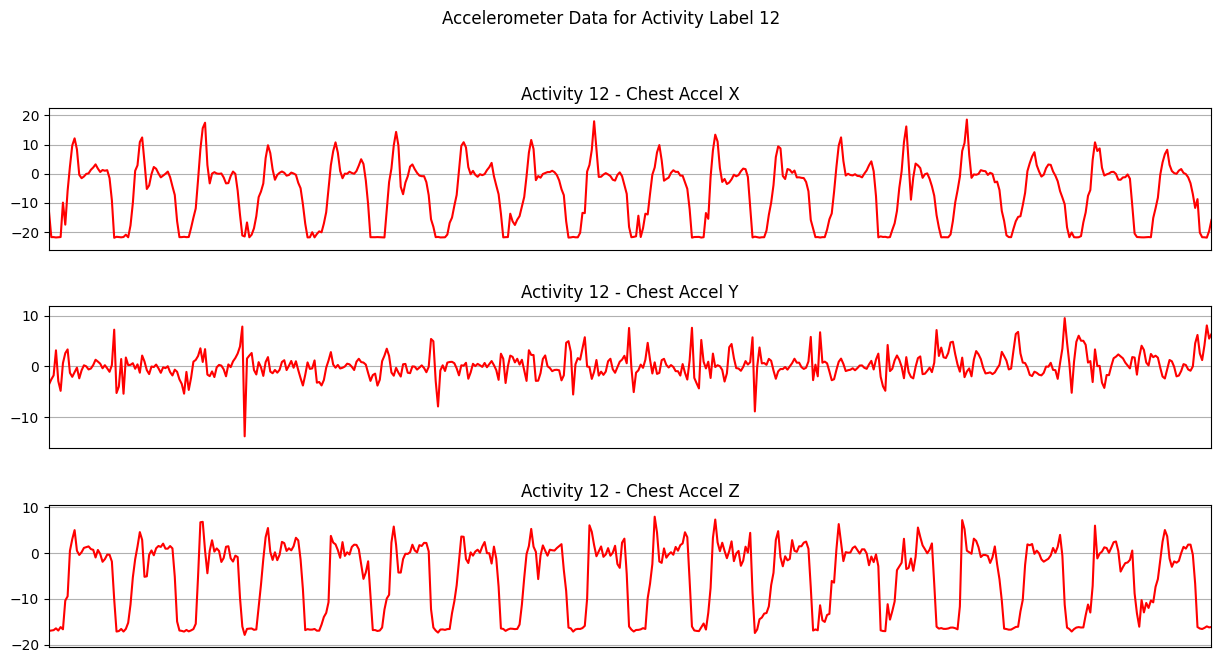

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_filtered is the DataFrame with activity_label != 0 and subject_id from previous steps

def axis_plot(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    # Adjust y-axis limits based on the data in the current window
    if len(y) > 1:
        y_min, y_max = min(y), max(y)
        y_range = y_max - y_min if y_max != y_min else abs(y_min) if y_min != 0 else 1
        padding = y_range * 0.1 # Add 10% padding
        ax.set_ylim([y_min - padding, y_max + padding])
    else:
         ax.set_ylim([y[0] - 1, y[0] + 1]) # Handle case with single data point
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)


# Select accelerometer columns from one sensor (e.g., chest)
acc_columns = ['chest_acc_x', 'chest_acc_y', 'chest_acc_z']

# Get unique activity labels (excluding 0, already filtered)
unique_activities = sorted(df_filtered['activity_label'].unique())

# Limit the number of data points to plot for each activity for readability
plot_limit = 500 # Adjust as needed, 50 Hz data, 500 points = 10 seconds

for activity in unique_activities:
    # Filter data for the current activity and take the first 'plot_limit' points
    activity_data = df_filtered[df_filtered['activity_label'] == activity].head(plot_limit).copy()

    if not activity_data.empty:
        # Use the index as a proxy for time
        x_values = activity_data.index

        fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(15, 7))

        # Plot accelerometer data for x, y, and z axes
        axis_plot(ax0, x_values, activity_data['chest_acc_x'], f'Activity {activity} - Chest Accel X')
        axis_plot(ax1, x_values, activity_data['chest_acc_y'], f'Activity {activity} - Chest Accel Y')
        axis_plot(ax2, x_values, activity_data['chest_acc_z'], f'Activity {activity} - Chest Accel Z')

        plt.subplots_adjust(hspace=0.4) # Increase vertical space between subplots
        fig.suptitle(f'Accelerometer Data for Activity Label {activity}', y=1.02) # Add a main title
        plt.show()
    else:
        print(f"No data found for activity label {activity} within the plot limit.")

## 데이터 전처리

### Subtask:
CNN 모델에 맞게 데이터를 전처리합니다. 여기에는 누락된 값 처리, 데이터 스케일링, 시계열 데이터를 CNN 입력 형식에 맞게 재구성하는 작업이 포함될 수 있습니다.

In [40]:
from sklearn.preprocessing import StandardScaler

# Assuming df_filtered is the DataFrame to be scaled from previous steps

# Identify the columns to scale (all except 'activity_label' and 'subject_id')
columns_to_scale = df_filtered.columns.drop(['activity_label', 'subject_id'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected columns
df_scaled = df_filtered.copy() # Create a copy to avoid modifying the original filtered dataframe
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

print("Data scaling completed.")
print("\nScaled DataFrame first 5 rows:")
display(df_scaled.head())
print("\nScaled DataFrame Info:")
df_scaled.info()

Data scaling completed.

Scaled DataFrame first 5 rows:


,chest_acc_x,chest_acc_y,chest_acc_z,ecg_lead_1,ecg_lead_2,left_ankle_acc_x,left_ankle_acc_y,left_ankle_acc_z,left_ankle_gyro_x,left_ankle_gyro_y,...,right_lower_arm_acc_y,right_lower_arm_acc_z,right_lower_arm_gyro_x,right_lower_arm_gyro_y,right_lower_arm_gyro_z,right_lower_arm_mag_x,right_lower_arm_mag_y,right_lower_arm_mag_z,activity_label,subject_id
6656,-0.402237,0.249278,0.463206,0.005629,-0.029663,0.200304,-0.075035,0.167061,-0.677291,-0.780659,...,-0.498658,-0.134866,0.25977,-0.958665,-1.406986,0.025953,-0.059176,-0.004608,1,1
6657,-0.401272,0.149935,0.361900,-0.034285,-0.019902,0.144872,-0.090207,0.170926,-0.677291,-0.780659,...,-0.520396,-0.206384,0.25977,-0.958665,-1.406986,0.036607,-0.041080,0.004149,1,1
6658,-0.416635,0.091640,0.376976,0.025586,0.028905,0.137943,-0.103380,0.183256,-0.657069,-0.733180,...,-0.518831,-0.198773,0.25977,-0.958665,-1.406986,0.025953,-0.059176,-0.004608,1,1
6659,-0.395590,0.113398,0.396427,0.210185,0.160678,0.135404,-0.103495,0.175169,-0.657069,-0.733180,...,-0.515805,-0.201022,0.22409,-0.958665,-1.398628,0.026005,-0.053185,-0.004629,1,1
6660,-0.402815,0.127633,0.399487,0.105413,0.063070,0.123089,-0.092130,0.170708,-0.657069,-0.733180,...,-0.520259,-0.183933,0.22409,-0.958665,-1.398628,0.015511,-0.053188,-0.009083,1,1



Scaled DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 343195 entries, 6656 to 1213645
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   chest_acc_x             343195 non-null  float64
 1   chest_acc_y             343195 non-null  float64
 2   chest_acc_z             343195 non-null  float64
 3   ecg_lead_1              343195 non-null  float64
 4   ecg_lead_2              343195 non-null  float64
 5   left_ankle_acc_x        343195 non-null  float64
 6   left_ankle_acc_y        343195 non-null  float64
 7   left_ankle_acc_z        343195 non-null  float64
 8   left_ankle_gyro_x       343195 non-null  float64
 9   left_ankle_gyro_y       343195 non-null  float64
 10  left_ankle_gyro_z       343195 non-null  float64
 11  left_ankle_mag_x        343195 non-null  float64
 12  left_ankle_mag_y        343195 non-null  float64
 13  left_ankle_mag_z        343195 non-null  float64
 1

In [41]:
def window_data(X, y, win=200, stride=100):
    """윈도우링 + 다수결 라벨링"""
    Xw, Yw = [], []
    i = 0
    while i+win <= len(X):
        seg = X[i:i+win]
        labels = y[i:i+win]
        maj = Counter(labels).most_common(1)[0][0]
        Xw.append(seg)
        Yw.append(maj)
        i += stride
    return np.array(Xw, dtype=np.float32), np.array(Yw, dtype=np.int32)

## CNN 모델 구축 및 교차 검증

### Subtask:
CNN 모델을 구축하고 교차검증합니다.

In [42]:
def build_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv1D(64, 5, activation="relu", input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv1D(128, 5, activation="relu"),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


In [43]:
def run_cv_with_dataframe(df_scaled, window=200, stride=100, epochs=5, batch=64):
    """
    Performs cross-validation using a pre-scaled DataFrame.

    Args:
        df_scaled (pd.DataFrame): The input scaled DataFrame with 'subject_id' and 'activity_label'.
        window (int): The window size for segmentation.
        stride (int): The stride for windowing.
        epochs (int): The number of epochs for training.
        batch (int): The batch size for training.
    """
    # Extract features (all columns except activity_label and subject_id) and labels
    feature_columns = df_scaled.columns.drop(['activity_label', 'subject_id'])
    X = df_scaled[feature_columns].values
    y = df_scaled['activity_label'].values
    subject_ids = df_scaled['subject_id'].values

    # Get unique subject IDs
    unique_subjects = sorted(df_scaled['subject_id'].unique())
    print("[INFO] Unique Subjects:", unique_subjects)

    # Define classes (excluding 0, which is already filtered out in df_scaled)
    classes = sorted(df_scaled['activity_label'].unique())
    print("[INFO] Classes:", classes)
    num_classes = len(classes)
    # Map activity labels to 0-based index for model training
    label_map = {label: i for i, label in enumerate(classes)}
    y_mapped = np.array([label_map[label] for label in y])


    # 5-Fold (user pairs)
    # Assuming subjects are 1-10. Adjust folds if subject IDs are different.
    folds = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

    accs = []
    for fi, (test_subject_a, test_subject_b) in enumerate(folds, 1):
        print(f"\n[Fold {fi}] Test Subjects: {test_subject_a}, {test_subject_b}")

        # Split data into training and testing based on subject IDs
        train_indices = np.where(~np.isin(subject_ids, [test_subject_a, test_subject_b]))[0]
        test_indices = np.where(np.isin(subject_ids, [test_subject_a, test_subject_b]))[0]

        Xtr_fold = X[train_indices]
        Ytr_fold = y_mapped[train_indices]
        Xte_fold = X[test_indices]
        Yte_fold = y_mapped[test_indices]

        print(f"[Fold {fi}] Raw Train Samples: {len(Xtr_fold)}")
        print(f"[Fold {fi}] Raw Test Samples: {len(Xte_fold)}")


        # Apply windowing to train and test data
        # Assuming window_data function is defined elsewhere and works on numpy arrays
        # window_data function needs to be adapted to handle the numpy arrays Xtr_fold, Ytr_fold, Xte_fold, Yte_fold
        # Let's assume window_data function takes numpy arrays and returns numpy arrays
        # We need to ensure window_data is compatible or define a new one for numpy arrays

        # For simplicity, let's define a windowing function that works on numpy arrays here
        def window_numpy_array(X_arr, y_arr, win=200, stride=100):
            Xw, Yw = [], []
            i = 0
            while i + win <= len(X_arr):
                seg = X_arr[i:i + win]
                labels = y_arr[i:i + win]
                # Use mode for majority voting, handle potential empty windows if stride is too large
                if len(labels) > 0:
                    maj = Counter(labels).most_common(1)[0][0]
                    Xw.append(seg)
                    Yw.append(maj)
                i += stride
            return np.array(Xw, dtype=np.float32), np.array(Yw, dtype=np.int32)


        Xtr_windowed, Ytr_windowed = window_numpy_array(Xtr_fold, Ytr_fold, window, stride)
        Xte_windowed, Yte_windowed = window_numpy_array(Xte_fold, Yte_fold, window, stride)


        print(f"[Fold {fi}] Windowed Train Samples: {len(Xtr_windowed)}")
        print(f"[Fold {fi}] Windowed Test Samples: {len(Xte_windowed)}")


        # Model creation and training
        # Input shape should be (window_size, number_of_features)
        input_shape = (window, Xtr_windowed.shape[-1])
        model = build_cnn(input_shape, num_classes=num_classes)
        print(f"[Fold {fi}] Model input shape: {input_shape}")


        model.fit(Xtr_windowed, Ytr_windowed, epochs=epochs, batch_size=batch,
                  validation_split=0.1, verbose=1)

        # Evaluate on test set
        loss, acc = model.evaluate(Xte_windowed, Yte_windowed, verbose=0)
        accs.append(acc)
        print(f"[Fold {fi}] Test Acc={acc * 100:.2f}%")

    print("\n[CV] Fold Accuracies:", [f"{a * 100:.2f}%" for a in accs])
    print("[CV] Mean Accuracy = {:.2f}%".format(np.mean(accs) * 100))

In [44]:
# 교차검증 실행 (예: 10 epoch)
# Assuming df_scaled is the scaled DataFrame from previous steps
# Assuming run_cv_with_dataframe, window_data, and build_cnn functions are defined

run_cv_with_dataframe(df_scaled, window=200, stride=100, epochs=10, batch=64)

[INFO] Unique Subjects: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
[INFO] Classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]

[Fold 1] Test Subjects: 1, 2
[Fold 1] Raw Train Samples: 272489
[Fold 1] Raw Test Samples: 70706
[Fold 1] Windowed Train Samples: 2723
[Fold 1] Windowed Test Samples: 706
[Fold 1] Model input shape: (200, 23)
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.5736 - loss: 1.3961 - val_accuracy: 0.6850 - val_loss: 1.2518
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9718 - loss: 0.1696 - val_accuracy: 0.8974 - val_loss: 0.6420
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9948 - loss: 0.0484 - val_accuracy: 0.8974 - val_loss: 0.3999
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9937 - loss: 0.0294 - val_accuracy: 0.9634 - val_loss: 0.1632
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9977 - loss: 0.0195 - val_accuracy: 0.9487 - val_loss: 0.1661
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9995 - loss: 0.0134 - val_accuracy: 0.8864 - val_loss: 0.1682
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9981 - loss: 0.0114 - val_accuracy: 0.8791 - val_loss: 0.1815
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9986 - loss: 0.0091 - val_accuracy: 0.9194 - val_loss: 0.1348
Ep

In [45]:
def run_cv_with_dataframe_ver2(df_scaled, window=200, stride=100, epochs=5, batch=64):
    """
    Cross-validation on a pre-scaled DataFrame.
    df_scaled must contain columns: ['subject_id', 'activity_label', feature...]
    """

    feature_columns = df_scaled.columns.drop(['activity_label', 'subject_id'])
    X_all = df_scaled[feature_columns].values
    y_all = df_scaled['activity_label'].values
    subject_ids = df_scaled['subject_id'].values

    # 클래스 집합 (0 제외된 상태라고 가정)
    classes = sorted(df_scaled['activity_label'].unique())
    label_map = {label: i for i, label in enumerate(classes)}
    y_mapped = np.array([label_map[label] for label in y_all])

    folds = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]
    accs = []

    # 윈도우링 함수 (numpy 버전)
    def window_numpy(X_arr, y_arr, win=200, stride=100):
        Xw, Yw = [], []
        i = 0
        while i + win <= len(X_arr):
            seg = X_arr[i:i+win]
            labels = y_arr[i:i+win]
            if len(labels) > 0:
                maj = Counter(labels).most_common(1)[0][0]
                Xw.append(seg)
                Yw.append(maj)
            i += stride
        return np.array(Xw, dtype=np.float32), np.array(Yw, dtype=np.int32)

    for fi, (test_a, test_b) in enumerate(folds, 1):
        print(f"\n[Fold {fi}] Test Subjects: {test_a}, {test_b}")

        # train / test split by subject
        train_mask = ~np.isin(subject_ids, [test_a, test_b])
        test_mask  =  np.isin(subject_ids, [test_a, test_b])

        Xtr, Ytr = X_all[train_mask], y_mapped[train_mask]
        Xte, Yte = X_all[test_mask],  y_mapped[test_mask]
        Subtr    = subject_ids[train_mask]

        # validation subject (훈련 8명 중 1명 고름 → 여기서는 가장 첫 번째 subject 선택)
        val_subject = np.unique(Subtr)[0]
        val_mask = (Subtr == val_subject)
        train_mask2 = (Subtr != val_subject)

        Xval, Yval = Xtr[val_mask], Ytr[val_mask]
        Xtr,  Ytr  = Xtr[train_mask2], Ytr[train_mask2]

        # ---------------- 윈도우링 ----------------
        Xtr_w, Ytr_w   = window_numpy(Xtr, Ytr, window, stride)
        Xval_w, Yval_w = window_numpy(Xval, Yval, window, stride)
        Xte_w, Yte_w   = window_numpy(Xte, Yte, window, stride)

        print(f"[Fold {fi}] Train={len(Xtr_w)} Val={len(Xval_w)} Test={len(Xte_w)}")

        # ---------------- 모델 ----------------
        input_shape = (window, Xtr_w.shape[-1])
        model = build_cnn(input_shape, num_classes=len(classes))

        model.fit(Xtr_w, Ytr_w, epochs=epochs, batch_size=batch,
                  validation_data=(Xval_w, Yval_w), verbose=1)

        # ---------------- 평가 ----------------
        loss, acc = model.evaluate(Xte_w, Yte_w, verbose=0)
        accs.append(acc)
        print(f"[Fold {fi}] Test Acc={acc*100:.2f}%")

    print("\n[CV] Fold Accuracies:", [f"{a*100:.2f}%" for a in accs])
    print("[CV] Mean Accuracy = {:.2f}%".format(np.mean(accs)*100))


In [46]:
# 교차검증 실행 (예: 10 epoch)
# Assuming df_scaled is the scaled DataFrame from previous steps
# Assuming run_cv_with_dataframe, window_data, and build_cnn functions are defined

run_cv_with_dataframe_ver2(df_scaled, window=200, stride=100, epochs=10, batch=64)


[Fold 1] Test Subjects: 1, 2
[Fold 1] Train=2370 Val=352 Test=706
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.6087 - loss: 1.2995 - val_accuracy: 0.5256 - val_loss: 1.6343
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9646 - loss: 0.1903 - val_accuracy: 0.7841 - val_loss: 1.0615
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9915 - loss: 0.0873 - val_accuracy: 0.8097 - val_loss: 0.6773
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9873 - loss: 0.0748 - val_accuracy: 0.8949 - val_loss: 0.4846
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9923 - loss: 0.0524 - val_accuracy: 0.8920 - val_loss: 0.4634
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9903 - loss: 0.0395 - val_accuracy: 0.8920 - val_loss: 0.5339
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9922 - loss: 0.0425 - val_accuracy: 0.8977 - val_loss: 0.6769
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9926 - loss: 0.0327 - val_accuracy: 0.8977 - val_loss: 0.6777
Ep